## Testing "link_extractor"

In [1]:
import pandas as pd
from link_extractor import Google, Bing

### Testing Google class

In [2]:
google = Google(company="Vulcan+Energy+Resources")
google_links = google.get_links(max_articles=100)

In [3]:
google_links

,Browser,Link
0,Google,https://www.marketscreener.com/quote/stock/VUL...
1,Google,https://finance.yahoo.com/news/vulcan-energy-r...
2,Google,https://www.wsj.com/articles/europe-moves-to-r...
3,Google,https://www.stellantis.com/en/news/press-relea...
4,Google,https://www.reuters.com/business/autos-transpo...
...,...,...
95,Google,https://www.thefabricator.com/stampingjournal/...
96,Google,https://www.fool.com.au/2022/08/26/why-this-br...
97,Google,https://www.detroitnews.com/story/business/aut...
98,Google,https://seekingalpha.com/article/4537454-lithi...


### Testing Bing class

In [4]:
bing = Bing(company="Vulcan+Energy+Resources")
bing_links = await bing.get_links(max_articles=100)

In [5]:
bing_links

,Browser,Link
0,Bing,https://www.ft.com/content/154c53aa-5a9a-4004-...
1,Bing,https://www.benzinga.com/quote/VULNF/dividend
2,Bing,https://www.msn.com/en-au/lifestyle/other/the-...
3,Bing,https://finance.yahoo.com/news/vulcan-energy-r...
4,Bing,https://www.reuters.com/company/vulcan-energy-...
...,...,...
95,Bing,https://www.fool.com.au/2021/08/23/why-charter...
96,Bing,https://www.marketwatch.com/press-release/dist...
97,Bing,https://www.uwyo.edu/ser/academic-programs/ene...
98,Bing,https://extension.purdue.edu/cdext/thematic-ar...


## Testing "html_content_extractor2"

### Combine links from Google and Bing

In [6]:
links = pd.concat([google_links, bing_links])

In [7]:
links["Browser"].value_counts()

Google    100
Bing      100
Name: Browser, dtype: int64

In [8]:
links["Link"].duplicated().sum()

7

In [9]:
urls = links["Link"].drop_duplicates().to_list()
len(urls)

193

In [10]:
from content_extractor2 import get_content

In [11]:
results = get_content(urls)

Getting news article info: 100%|██████████| 193/193 [10:57<00:00,  3.40s/it]

The following news sources could not be accessed or resulted in an error:
https://www.mining.com/vulcan-energy-to-mine-60-more-german-lithium-than-planned/ 

https://www.fool.com.au/2022/10/03/down-30-in-2022-heres-why-im-holding-tight-to-my-vulcan-energy-shares/ 

https://themarketherald.com.au/vulcan-energy-asxvul-develops-in-house-vulsorb-lithium-extraction-technology-2022-11-14/ 

https://www.nasdaq.com/market-activity/stocks/vulnf/news-headlines 

https://www.investing.com/equities/koppar-resources-historical-data 

https://www.fool.com.au/2021/12/23/the-vulcan-energy-asx-vul-share-price-is-down-12-so-far-this-week-whats-happening/ 

https://www.mining.com/web/factbox-automakers-accelerate-the-drive-to-secure-battery-raw-materials/ 

https://www.ntnews.com.au/business/vulcan-energy-says-its-well-placed-to-help-fill-europes-huge-lithium-shortfall/news-story/0d2968ddecdfd7544d37c5cf2105a66b 

https://www.adelaidenow.com.au/business/stockhead/piedmonts-tesla-deal-gets-real-and-other-

In [12]:
results.head(10)

,Link,Title,Body,Author,Published
0,https://www.marketscreener.com/quote/stock/VUL...,Vulcan Energy Resources Limited Announces Chan...,Or log in with,[],None
1,https://finance.yahoo.com/news/vulcan-energy-r...,Vulcan Energy Resources Limited (ASX:VUL) most...,Key Insights\n\nSignificant control over Vulca...,[Simply Wall St],None
2,https://www.wsj.com/articles/europe-moves-to-r...,Europe Moves to Revive Mining to Cut Reliance ...,"INSHEIM, Germany—Near the Rhine river in this ...",[Eric Sylvers],None
3,https://www.stellantis.com/en/news/press-relea...,Vulcan and Stellantis Explore Geothermal Energ...,Project marks Stellantis’ first potential use ...,[],None
4,https://www.reuters.com/business/autos-transpo...,"Stellantis, Vulcan Energy to develop renewable...",\n\n\n\n\n\n\n\n\n\n\n\n\n\nJan 17 (Reuters) -...,[],2023-01-16 00:00:00
5,https://www.ft.com/content/154c53aa-5a9a-4004-...,Subscribe to read,What is included in my trial?\n\nDuring your t...,[],None
6,https://batteriesnews.com/vulcan-energy-source...,Vulcan Energy to Source More Lithium in Germany,Vulcan Energy to source more lithium in German...,[],2023-02-13 19:55:26+00:00
7,https://simplywall.st/stocks/au/materials/asx-...,We Think Vulcan Energy Resources (ASX:VUL) Can...,There's no doubt that money can be made by own...,[],None
8,https://www.electrive.com/2022/11/07/vulcan-ex...,Vulcan expands lithium project in France,Vulcan Energy Resources is planning to develop...,[Author],2022-11-07 00:00:00
9,https://www.renewableenergymagazine.com/geothe...,Vulcan and Stellantis Explore Geothermal Energ...,"The first phase of the project, located at the...",[],2023-01-17 00:00:00


## Some NLP Preprocessing

In [13]:
len(results)

182

In [14]:
data = results.loc[results["Body"].str.strip().astype(bool)].reset_index(drop=True)

In [15]:
len(data)

134

In [16]:
data.head()

,Link,Title,Body,Author,Published
0,https://www.marketscreener.com/quote/stock/VUL...,Vulcan Energy Resources Limited Announces Chan...,Or log in with,[],None
1,https://finance.yahoo.com/news/vulcan-energy-r...,Vulcan Energy Resources Limited (ASX:VUL) most...,Key Insights\n\nSignificant control over Vulca...,[Simply Wall St],None
2,https://www.wsj.com/articles/europe-moves-to-r...,Europe Moves to Revive Mining to Cut Reliance ...,"INSHEIM, Germany—Near the Rhine river in this ...",[Eric Sylvers],None
3,https://www.stellantis.com/en/news/press-relea...,Vulcan and Stellantis Explore Geothermal Energ...,Project marks Stellantis’ first potential use ...,[],None
4,https://www.reuters.com/business/autos-transpo...,"Stellantis, Vulcan Energy to develop renewable...",\n\n\n\n\n\n\n\n\n\n\n\n\n\nJan 17 (Reuters) -...,[],2023-01-16 00:00:00


In [17]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings("ignore")

import string
import nltk
# Import the stop word list
from nltk.corpus import stopwords
nltk.download("stopwords")
# Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
# Import stemmer.
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/johnbergmann/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
# Average Wordcount before pre-processing
data["Body"].apply(lambda x: len(x.split())).mean()

741.5895522388059

In [19]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x.split())).sum()

99373

### Remove Numbers (We are doing reputational NLP so doesnt seem relevant)

In [20]:
def remove_numbers(text):
    no_nums = "".join([i for i in text if not i.isdigit()])
    return no_nums

In [21]:
data["Body"] = data["Body"].apply(lambda x: remove_numbers(x))
data["Body"].head(10)

0                                       Or log in with
1    Key Insights\n\nSignificant control over Vulca...
2    INSHEIM, Germany—Near the Rhine river in this ...
3    Project marks Stellantis’ first potential use ...
4    \n\n\n\n\n\n\n\n\n\n\n\n\n\nJan  (Reuters) - A...
5    What is included in my trial?\n\nDuring your t...
6    Vulcan Energy to source more lithium in German...
7    There's no doubt that money can be made by own...
8    Vulcan Energy Resources is planning to develop...
9    The first phase of the project, located at the...
Name: Body, dtype: object

### Removing extra whitespaces / new lines

In [22]:
data["Body"] = data["Body"].replace(r'\n'," ", regex=True)

### Removing Punctuation

In [23]:
def remove_punctuation(text):
    no_punct = "".join ([c for c in text if c not in string.punctuation])
    return no_punct

In [24]:
data["Body"] = data["Body"].apply(lambda x: remove_punctuation(x))
data["Body"].head(10)

0                                       Or log in with
1    Key Insights  Significant control over Vulcan ...
2    INSHEIM Germany—Near the Rhine river in this p...
3    Project marks Stellantis’ first potential use ...
4                  Jan  Reuters  Automaker Stellant...
5    What is included in my trial  During your tria...
6    Vulcan Energy to source more lithium in German...
7    Theres no doubt that money can be made by owni...
8    Vulcan Energy Resources is planning to develop...
9    The first phase of the project located at the ...
Name: Body, dtype: object

### Tokenization

In [25]:
tokenizer = RegexpTokenizer(r'\w+')

In [26]:
data["Body"] = data["Body"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Body"].head(10)

0                                  [or, log, in, with]
1    [key, insights, significant, control, over, vu...
2    [insheim, germany, near, the, rhine, river, in...
3    [project, marks, stellantis, first, potential,...
4    [jan, reuters, automaker, stellantis, stlami, ...
5    [what, is, included, in, my, trial, during, yo...
6    [vulcan, energy, to, source, more, lithium, in...
7    [theres, no, doubt, that, money, can, be, made...
8    [vulcan, energy, resources, is, planning, to, ...
9    [the, first, phase, of, the, project, located,...
Name: Body, dtype: object

### Removing Stopwords

In [27]:
def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words("english")]
    return words

In [28]:
data["Body"] = data["Body"].apply(lambda x: remove_stopwords(x))
data["Body"].head(10)

0                                                [log]
1    [key, insights, significant, control, vulcan, ...
2    [insheim, germany, near, rhine, river, part, w...
3    [project, marks, stellantis, first, potential,...
4    [jan, reuters, automaker, stellantis, stlami, ...
5    [included, trial, trial, complete, digital, ac...
6    [vulcan, energy, source, lithium, germany, vul...
7    [theres, doubt, money, made, owning, shares, u...
8    [vulcan, energy, resources, planning, develop,...
9    [first, phase, project, located, northernmost,...
Name: Body, dtype: object

### Lemmatization

In [29]:
lemmatizer = WordNetLemmatizer()

In [30]:
def word_lemmatizer(text):
    lem_text = [lemmatizer.lemmatize (i) for i in text]
    return lem_text

In [31]:
data["Body"] = data["Body"].apply(lambda x: word_lemmatizer(x))
data["Body"].head(10)

0                                                [log]
1    [key, insight, significant, control, vulcan, e...
2    [insheim, germany, near, rhine, river, part, w...
3    [project, mark, stellantis, first, potential, ...
4    [jan, reuters, automaker, stellantis, stlami, ...
5    [included, trial, trial, complete, digital, ac...
6    [vulcan, energy, source, lithium, germany, vul...
7    [there, doubt, money, made, owning, share, unp...
8    [vulcan, energy, resource, planning, develop, ...
9    [first, phase, project, located, northernmost,...
Name: Body, dtype: object

In [32]:
# Average Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).mean()

456.8134328358209

In [33]:
# Total Wordcount after pre-processing
data["Body"].apply(lambda x: len(x)).sum()

61213

### Encoding

In [34]:
text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

In [35]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)

 abcdefghijklmnopqrstuvwxyz½ßâãéëöü
35


In [36]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate (chars) }
itos = { i:ch for i,ch in enumerate (chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''. join ( [itos [i] for i in l]) # decoder: take a list of integers, output a string
print (encode("hii there"))
print (decode(encode("hii there")))

[8, 9, 9, 0, 20, 8, 5, 18, 5]
hii there


### Wordcloud - Test

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

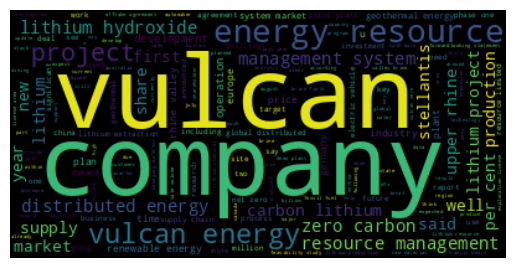

In [38]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Wordcloud on Titles only

In [39]:
data["Title"] = data["Title"].apply(lambda x: remove_numbers(x))
data["Title"] = data["Title"].replace(r'\n'," ", regex=True)
data["Title"] = data["Title"].apply(lambda x: remove_punctuation(x))
data["Title"] = data["Title"].apply(lambda x: tokenizer.tokenize(x.lower()))
data["Title"] = data["Title"].apply(lambda x: remove_stopwords(x))
data["Title"] = data["Title"].apply(lambda x: word_lemmatizer(x))

In [40]:
title_text = data["Body"].apply(lambda x: " ".join(x)).str.cat()

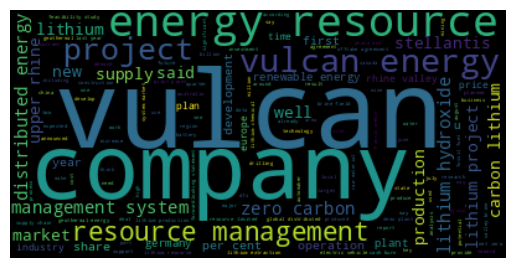

In [41]:
# Create and generate a word cloud image:
title_wordcloud = WordCloud().generate(title_text)

# Display the generated image:
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()